# CFC_gray

# Dataset setup

This was really messy and time-consuming.

To set up data, do:
- Download zip files
- Convert to YOLO format
    - for now we do CFC/images/train and CFC/labels/train etc
    - Remember adding empty .txt files for background images (images with no instance)
    - write yaml file
- Run summary script to see if ok


### Make labels on right format. COCO -> YOLO

In [ ]:
# import json, os
# from pathlib import Path
# from collections import defaultdict

# ROOT   = Path("../data/CFC")
# IMAGES = ROOT / "images/val"

# SPLIT_DIR = {"train": "cfc_train", "val": "cfc_val", "test": "cfc_test"}

# def clip(v, lo, hi): return max(lo, min(hi, v))

# def resolve_image_path(file_name, split):
#     # Try the real split dir first
#     p = IMAGES / SPLIT_DIR.get(split, split) / file_name
#     if p.exists():
#         return p
#     # Fallbacks if JSON already contains subdirs or files are at root
#     q = IMAGES / file_name
#     if q.exists():
#         return q
#     r = IMAGES / split / file_name
#     return r  # may not exist; caller will check

# def convert(split, coco_json):
#     labels_dir = ROOT / "labels" / split
#     labels_dir.mkdir(parents=True, exist_ok=True)
#     coco = json.loads(Path(coco_json).read_text())

#     id2img = {im["id"]: im for im in coco["images"]}
#     byimg = defaultdict(list)
#     for a in coco["annotations"]:
#         if a.get("iscrowd", 0) == 1 or a.get("ignore", 0) == 1:
#             continue
#         byimg[a["image_id"]].append(a)

#     sorted_cats = sorted(coco["categories"], key=lambda c: c["id"])
#     cat2idx = {c["id"]: i for i, c in enumerate(sorted_cats)}

#     written = missing = 0
#     for img_id, img in id2img.items():
#         img_path = resolve_image_path(img["file_name"], split)
#         if not img_path.exists():
#             missing += 1
#             continue

#         W, H = img["width"], img["height"]
#         lines = []
#         for ann in byimg.get(img_id, []):
#             x, y, w, h = ann["bbox"]
#             x = clip(x, 0, W); y = clip(y, 0, H)
#             w = clip(w, 0, W - x); h = clip(h, 0, H - y)
#             if w <= 0 or h <= 0: 
#                 continue
#             xc = (x + w / 2) / W
#             yc = (y + h / 2) / H
#             wn = w / W
#             hn = h / H
#             cls = cat2idx[ann["category_id"]]
#             lines.append(f"{cls} {xc:.6f} {yc:.6f} {wn:.6f} {hn:.6f}")

#         if lines:
#             (labels_dir / (Path(img["file_name"]).stem + ".txt")).write_text("\n".join(lines))
#             written += 1

#     print(f"{split}: wrote labels for {written} images; missing files: {missing}")

# #convert("train", ROOT/"CFC_ANN"/"cfc_train.json")
# convert("val",   ROOT/"CFC_ANN"/"cfc_val.json")


val: wrote labels for 9925 images; missing files: 0


### check if paths are ok


In [ ]:
# from pathlib import Path
# import os, shutil

# # Paths
# NOT_ROOT = Path.cwd()              
# ROOT = NOT_ROOT.parent
# DATA = ROOT / "data" / "CFC"



# # Define paths
# IMAGES_TRAIN = DATA / "images" / "train"
# IMAGES_VAL   = DATA / "images" / "val"
# LABELS_TRAIN = DATA / "labels" / "train"
# LABELS_VAL   = DATA / "labels" / "val"

# # Check everything exists
# for p in [IMAGES_TRAIN, IMAGES_VAL, LABELS_TRAIN, LABELS_VAL]:
#     print(p, "✅ OK" if p.exists() else "❌ MISSING")


/Users/henrik/kode/SP/aqua_yolo/data/CFC/images/train ✅ OK
/Users/henrik/kode/SP/aqua_yolo/data/CFC/images/val ✅ OK
/Users/henrik/kode/SP/aqua_yolo/data/CFC/labels/train ✅ OK
/Users/henrik/kode/SP/aqua_yolo/data/CFC/labels/val ✅ OK


### Grayscale convertion

In [ ]:
# import cv2
# from pathlib import Path

# in_dir = Path("../data/CFC/images/val")
# out_dir = Path("../data/CFC_gray/images/val")
# out_dir.mkdir(parents=True, exist_ok=True)

# valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff']

# count = 0
# for p in in_dir.rglob("*.*"):
#     if p.suffix.lower() not in valid_extensions:
#         continue
    
#     img = cv2.imread(str(p), cv2.IMREAD_COLOR)
    
#     if img is None:
#         print(f"Failed to load image: {p}")
#         continue

#     # Convert to grayscale and replicate to 3 channels
#     g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     g3 = cv2.cvtColor(g, cv2.COLOR_GRAY2BGR)
#     cv2.imwrite(str(out_dir / p.name), g3)
#     count +=1
#     if count%1000==0: 
#         print(count)


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
Failed to load image: ../data/CFC/images/val/2018-06-03-JD154_LeftNear_Stratum1_Set1_LN_2018-06-03_030000_1888_2429_142.jpg
25000
26000
27000
28000
29000
30000


### Delete .npz files

These were created by accident

In [ ]:
# import os
# from pathlib import Path

# ROOT = Path("../data/CFC_gray")
# IMG_DIRS = [
#     ROOT/"images"/"train",
#     ROOT/"images"/"val",
#     ROOT/"images"/"test",
# ]

# deleted = 0
# for d in IMG_DIRS:
#     if d.exists():
#         for p in d.rglob("*.npy"):
#             p.unlink()
#             deleted += 1

# # also remove stale .cache files Ultralytics might have created
# cache_deleted = 0
# for p in ROOT.rglob("*.cache"):
#     p.unlink()
#     cache_deleted += 1

# print(f"Deleted {deleted} .npy files.")
# print(f"Deleted {cache_deleted} .cache files.")


Deleted 107072 .npy files.
Deleted 2 .cache files.


### Write yaml

In [ ]:
from pathlib import Path

# Base paths
NOT_ROOT = Path.cwd()
ROOT = NOT_ROOT.parent

DATA = ROOT / "data" / "CFC_gray"

IMAGES_TRAIN = DATA / "images" / "train"
IMAGES_VAL   = DATA    / "images" / "val"


# Build YAML (classic YOLO: train/val/test point to images dirs)
dataset_yaml = f"""
path: {DATA.as_posix()}
train: {IMAGES_TRAIN.as_posix()}
val:   {IMAGES_VAL.as_posix()}


nc: 1
names: 
    - fish
"""

# Write YAML next to the dataset
yaml_path = DATA / "cfc.yaml"
yaml_path.write_text(dataset_yaml.strip() + "\n", encoding="utf-8")

print("Wrote:", yaml_path)
print("\nPreview:\n")
print(dataset_yaml)


Wrote: /cluster/home/henrban/SOLAQUA-UOD/aqua_yolo/data/CFC_gray_tiny/cfc.yaml

Preview:


path: /cluster/home/henrban/SOLAQUA-UOD/aqua_yolo/data/CFC_gray_tiny
train: /cluster/home/henrban/SOLAQUA-UOD/aqua_yolo/data/CFC_gray_tiny/images/train
val:   /cluster/home/henrban/SOLAQUA-UOD/aqua_yolo/data/CFC_gray_tiny/images/val


nc: 1
names: 
    - fish



### Visualize

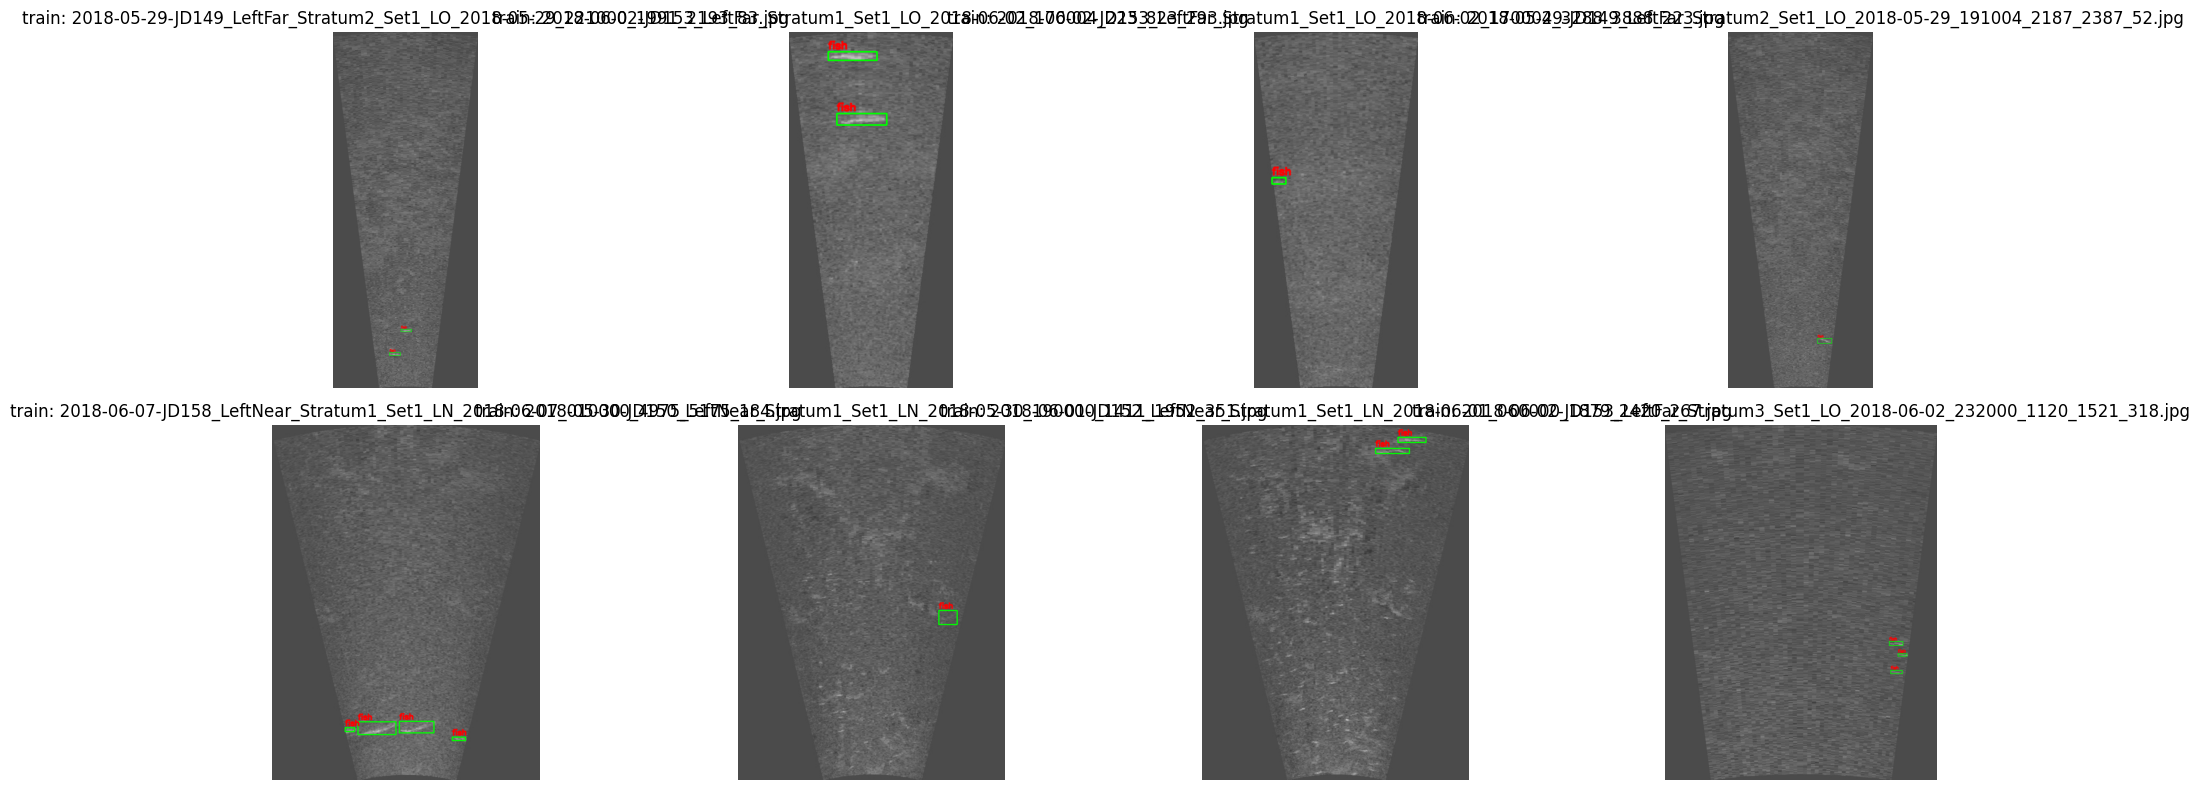

In [4]:
import os, math, random, re
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

# ---------------- config ----------------
DATA_ROOT = Path("../data/CFC_gray")
IMG_ROOT  = DATA_ROOT / "images"
LAB_ROOT  = DATA_ROOT / "labels"

SPLIT = "train"   # "train" or "test"
IMG_DIR = IMG_ROOT / SPLIT
LAB_DIR = LAB_ROOT / SPLIT

NUM_PICS = 8
COLS = 4


CFC_NAMES = [
    "fish"
]
# ----------------------------------------

def find_images(folder: Path):
    exts = (".jpg",".jpeg",".png",".bmp",".tif",".tiff")
    return [p for p in folder.rglob("*") if p.suffix.lower() in exts]

def label_path_for(img_path: Path) -> Path:
    return LAB_DIR / (img_path.stem + ".txt")

def draw_yolo_labels(image_bgr, label_file: Path, names):
    img = image_bgr.copy()
    h, w = img.shape[:2]
    if not label_file.exists():
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for line in label_file.read_text().splitlines():
        line = line.strip()
        if not line:
            continue
        # YOLO format: class cx cy w h (normalized 0..1)
        parts = re.split(r"\s+", line)
        if len(parts) < 5:
            continue
        cls = int(float(parts[0]))
        cx, cy, bw, bh = map(float, parts[1:5])

        x1 = int((cx - bw/2) * w); y1 = int((cy - bh/2) * h)
        x2 = int((cx + bw/2) * w); y2 = int((cy + bh/2) * h)
        x1 = max(0, min(w-1, x1)); y1 = max(0, min(h-1, y1))
        x2 = max(0, min(w-1, x2)); y2 = max(0, min(h-1, y2))

        color = (0,255,0)
        cv2.rectangle(img, (x1,y1), (x2,y2), color, 2)
        label = names[cls] if 0 <= cls < len(names) else f"id{cls}"
        cv2.putText(img, label, (x1, max(0, y1-5)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 2, cv2.LINE_AA)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# collect images that exist (optionally: require label file exists too)
all_imgs = find_images(IMG_DIR)
imgs_with_labels = [p for p in all_imgs if label_path_for(p).exists()]
pool = imgs_with_labels if imgs_with_labels else all_imgs

if not pool:
    raise FileNotFoundError(f"No images found in {IMG_DIR}")

sample_ids = random.sample(pool, min(NUM_PICS, len(pool)))
rows = math.ceil(len(sample_ids) / COLS)

plt.figure(figsize=(5*COLS, 4*rows))
for idx, img_path in enumerate(sample_ids, 1):
    img_bgr = cv2.imread(str(img_path))
    if img_bgr is None:
        continue
    lab_path = label_path_for(img_path)
    vis = draw_yolo_labels(img_bgr, lab_path, CFC_NAMES)

    plt.subplot(rows, COLS, idx)
    plt.imshow(vis)
    plt.axis("off")
    plt.title(f"{SPLIT}: {img_path.name}")
plt.tight_layout(); plt.show()


### Dataset summary

Not nesacery, we have this info in the paper. **TODO** But could be nice to confirm. 

# Building

Building (and training) of the model happens in [train.py](../train.py). The model is constructed by the [aquayolo.yaml](../models/aquayolo.yaml), that imports modules from custom blocks (see paragraph below).

### Adding custom blocks

I have added custom blocks to match the architecture as pruposed in the paper. For this to work I have first cloned the ultralytics repo.
- Head to [ultralytics](https://docs.ultralytics.com/guides/model-yaml-config/#source-code-modification) to see how to add custom blocks.
- Files that is modified: [block.py](../../ultralytics/ultralytics/nn/modules/block.py) (classes: AquaResidualBlock, DSAM), [tasks.py](../../ultralytics/ultralytics/nn/tasks.py) (added imports and updated parse_model() for special arguments), [__init__.py](../../ultralytics/ultralytics/nn/modules/__init__.py) (exposing the modules).



# Training

- To train the model run the train.py script by doing: `python3 train.py`

Train.py script:

```bash

# train.py

from ultralytics import YOLO


if __name__ == "__main__":
    
    # Load custom model cfg
    m = YOLO("models/aquayolo.yaml")
    m.info()  # non-zero FLOPs confirms forward path OK

    m.train(
        data="data/CFC_gray/cfc_gray.yaml",
        pretrained=False,          # Safest off
        epochs=60, 
        imgsz=640,
        batch=512,
        nbs=512,


    # optimizer
        optimizer="AdamW",
        lr0=3e-4,
        weight_decay=0.01,
        cos_lr=True,
        lrf=0.01,
        warmup_epochs=3,
        patience=20,            


    # loss balance – tilt a bit toward recall
        box=10.0, cls=0.6, dfl=1.3,


    # sonar-friendly aug, we do nothing really, is this ok?
        auto_augment=None,  
        # geometry
        degrees=0.0,          # no rotation (shadow direction is meaningful)
        shear=0.0,
        perspective=0.0,
        translate=0.02,       # small shifts are ok
        scale=0.35,            # Ultralytics default scale jitter; fine for sonar

        # photometrics
        hsv_h=0.0, hsv_s=0.0, hsv_v=0.0,  # disable HSV for gray-scale sonar

        # composition
        mosaic=0.0,           # off (mosaic creates unrealistic seabed continuity)
        mixup=0.0,            # off (blends break acoustic edges)
        copy_paste=0.0,       # off (unlikely to preserve shadows correctly)

        # flips
        fliplr=0.05,           # small chance; left/right symmetry may be acceptable
        flipud=0.0,           # avoid flipping seabed “upside-down”

        # occlusion-like
        erasing=0.15,          # light Random Erasing to mimic dropouts/occlusions
        
    

        
    # system
        workers=8,                 # safe
        device=[0, 1, 2, 3],
        project="runs_aquayolo",
        name="cfc_gray_adamW_m",
        seed=0,
        plots=False,
        cache=False,
        amp=False,  
    )

```



### How I did training

- Using the IDUN computer at NTNU. 
    - Idun settings: 4 GPUS (H200). 64 CPU cores, 256 GB RAM, 



# Evalutation

# cfc_gray trained, cfc_gray tested

### Get results 

In [2]:
from ultralytics import YOLO
model = YOLO("../runs_aquayolo/cfc_gray_adamW_m/weights/best.pt")
results = model.val(
    data="../data/CFC_gray/cfc_gray.yaml",
    imgsz=640,
    batch=1,
    iou=0.7,
    plots=True,
    project="../runs_aquayolo",
    name="EVAL_cfc_gray_m",
    exist_ok=True
)


Ultralytics 8.3.213 🚀 Python-3.9.21 torch-2.8.0+cu128 CUDA:0 (NVIDIA H200, 143156MiB)
aquaYOLO summary: 301 layers, 56,841,107 parameters, 0 gradients, 169.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 451.1±360.6 MB/s, size: 124.6 KB)
val: Scanning /cluster/home/henrban/SOLAQUA-UOD/aqua_yolo/data/CFC_gray/labels/val.cache... 30453 images, 20528 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 30453/30453 56.3Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 30453/30453 94.1it/s 5:23<0.0s
                   all      30453      18551      0.829       0.57      0.648      0.295
Speed: 0.1ms preprocess, 9.4ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /cluster/home/henrban/SOLAQUA-UOD/aqua_yolo/runs_aquayolo/EVAL_cfc_gray_m


### Show evaluation metrics

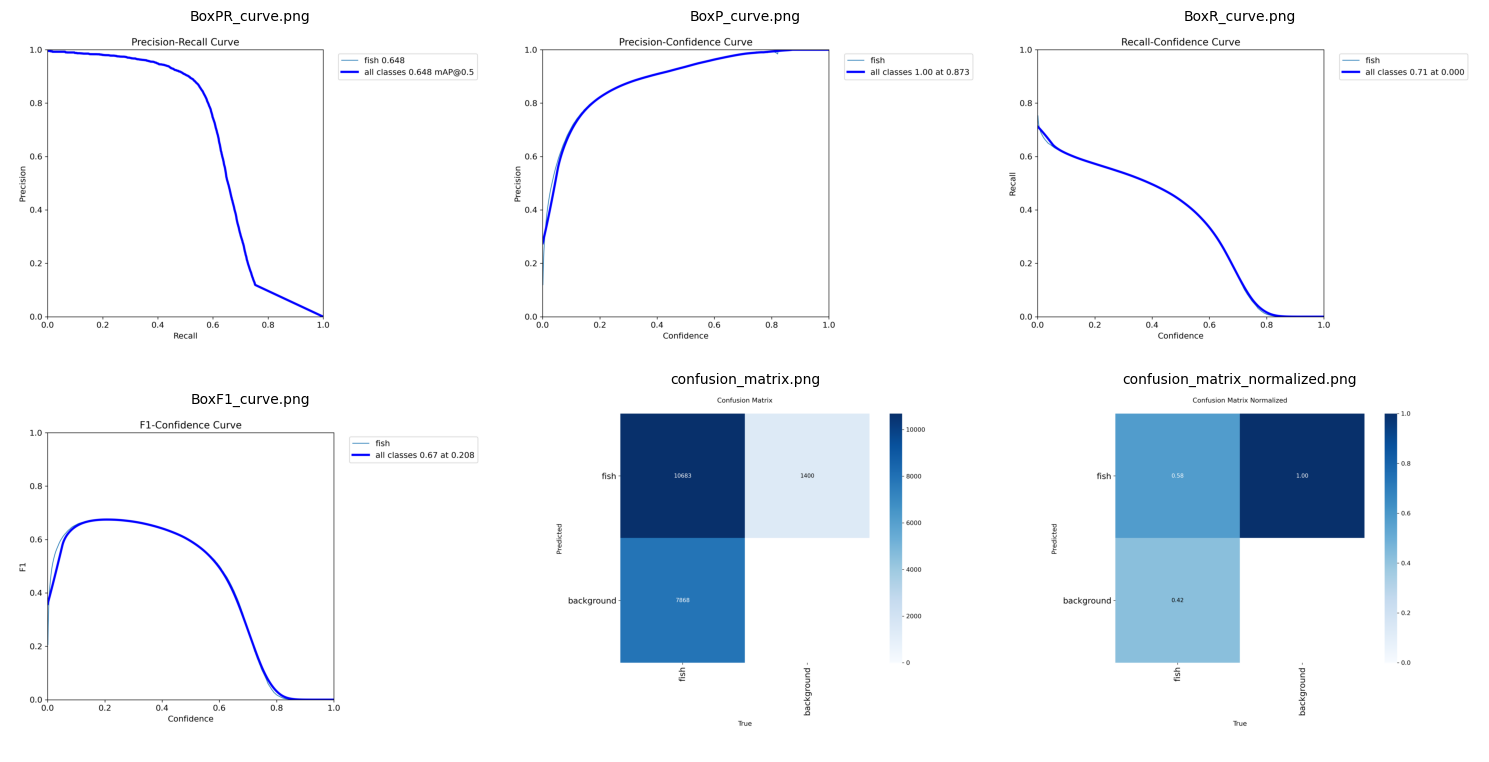

In [ ]:
from utils.evaluation_utils import plot_evaluation_metrics

run_dir = "../runs_aquayolo/EVAL_cfc_gray_m"

plot_evaluation_metrics(run_dir)

### Show predictions

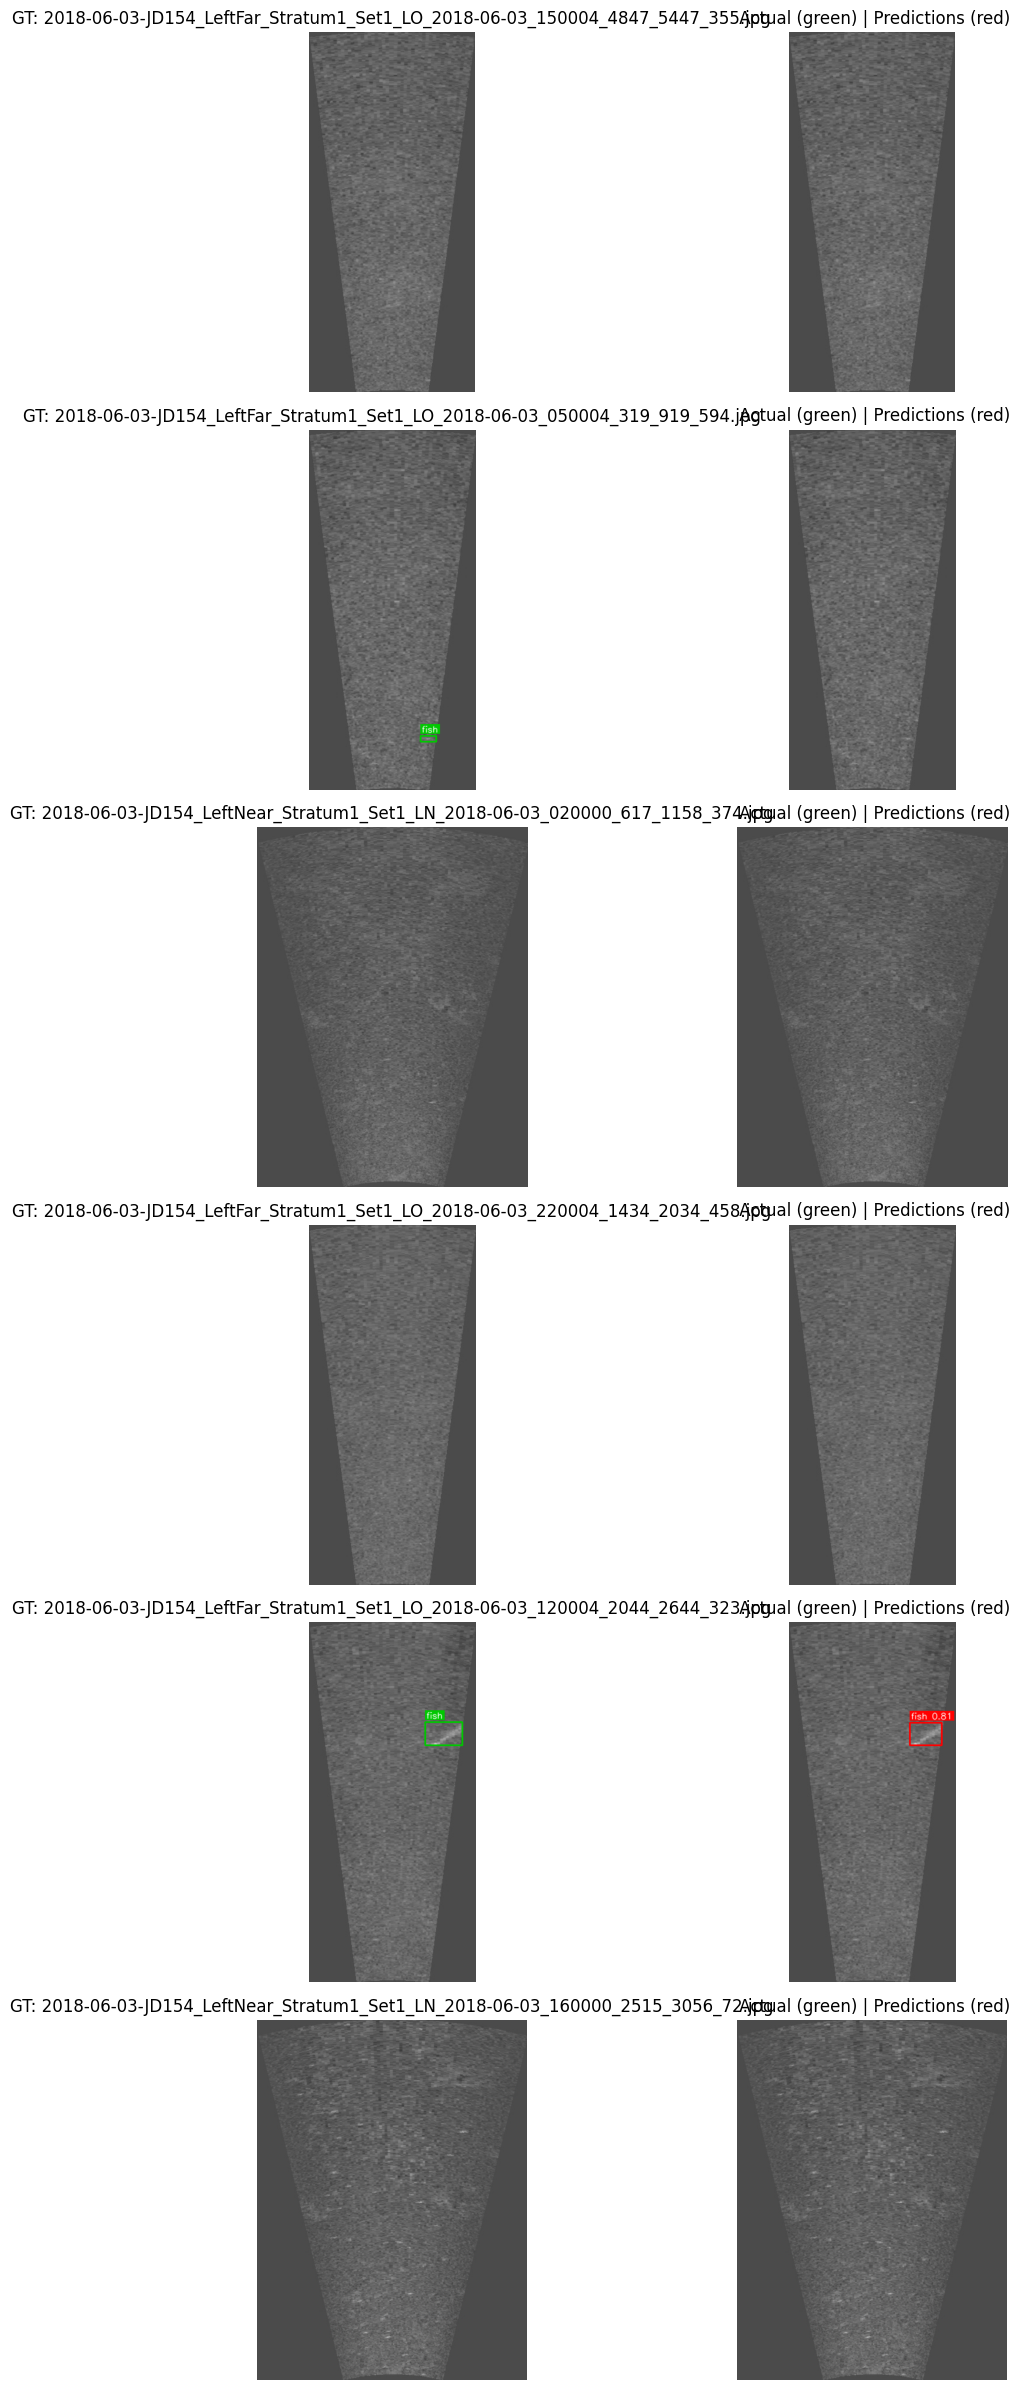

In [ ]:
from utils.evaluation_utils import plot_yolo_predictions_samples

plot_yolo_predictions_samples(
    images_dir="../data/CFC_gray/images/val",
    labels_dir="../data/CFC_gray/labels/val",
    weights="../runs_aquayolo/cfc_gray_adamW_m/weights/best.pt",
    num_samples=6,
    conf_thres=0.25,
    imgsz=640
)


# CFC_gray trained CFC_gray_tiny tested


### get results


In [4]:
from ultralytics import YOLO
model = YOLO("../runs_aquayolo/cfc_gray_adamW_m/weights/best.pt")
results = model.val(
    data="../data/CFC_gray_tiny/cfc_gray_tiny.yaml",
    imgsz=640,
    batch=1,
    iou=0.7,
    plots=True,
    project="../runs_aquayolo",
    name="EVAL_cfc_gray_on_tiny",
    exist_ok=True
)


Ultralytics 8.3.213 🚀 Python-3.9.21 torch-2.8.0+cu128 CUDA:0 (NVIDIA A100-PCIE-40GB, 40441MiB)
aquaYOLO summary: 301 layers, 56,841,107 parameters, 0 gradients, 169.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 358.5±178.8 MB/s, size: 88.7 KB)
val: Scanning /cluster/home/henrban/SOLAQUA-UOD/aqua_yolo/data/CFC_gray_tiny/labels/val... 27701 images, 19130 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 27701/27701 3.4Kit/s 8.2s0.1s
val: New cache created: /cluster/home/henrban/SOLAQUA-UOD/aqua_yolo/data/CFC_gray_tiny/labels/val.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 27701/27701 63.1it/s 7:19<0.0s
                   all      27701      16020      0.848      0.615      0.695      0.317
Speed: 0.2ms preprocess, 14.2ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /cluster/home/henrban/SOLAQUA-UOD/aqua_yolo/runs_aquayolo/EVAL_cfc_gray_on_tiny


### view evaluation metrics images

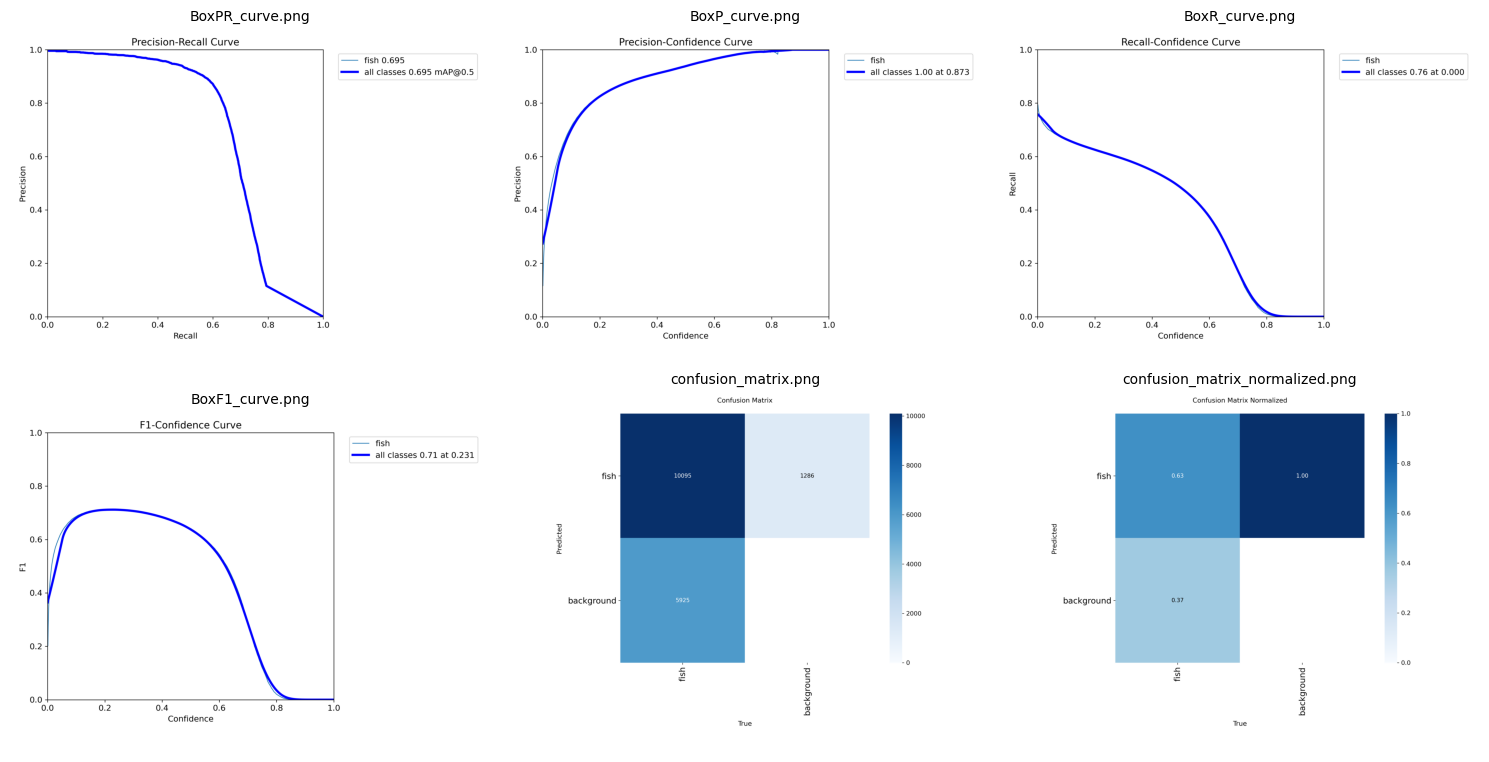

In [7]:
from utils.evaluation_utils import plot_evaluation_metrics

run_dir = "../runs_aquayolo/EVAL_cfc_gray_on_tiny"

plot_evaluation_metrics(run_dir)

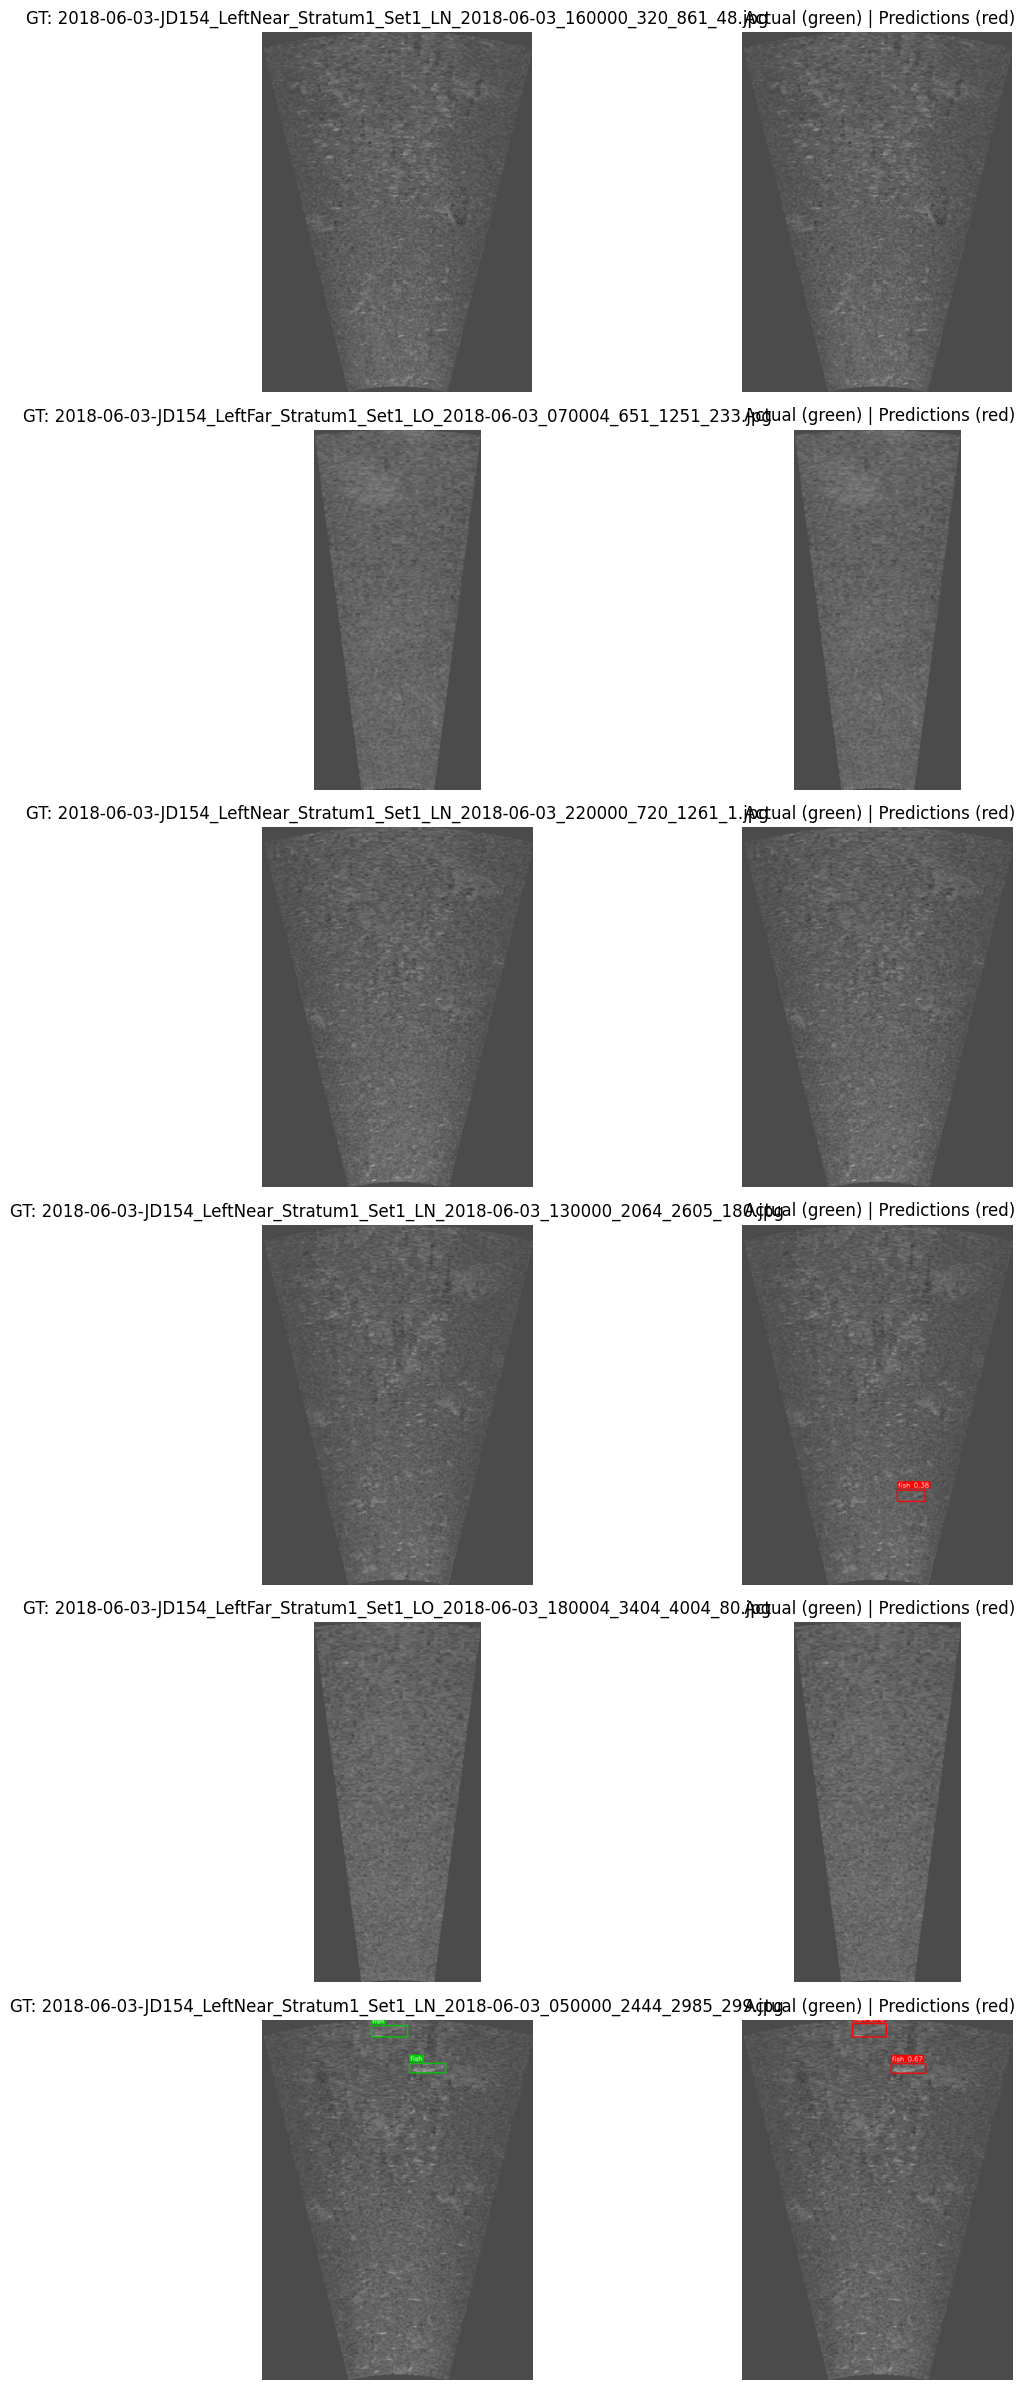

In [8]:
from utils.evaluation_utils import plot_yolo_predictions_samples

plot_yolo_predictions_samples(
    images_dir="../data/CFC_gray_tiny/images/val",
    labels_dir="../data/CFC_gray_tiny/labels/val",
    weights="../runs_aquayolo/cfc_gray_adamW_m/weights/best.pt",
    num_samples=6,
    conf_thres=0.25,
    imgsz=640
)